In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
import scipy

import matplotlib.pyplot as plt

In [2]:
# datapath = '/media/birniece/Extreme SSD/HydraFrac/SandBox_DAS_data/Finished_Processed data_5kHz to 10 kHz Chirp/Processed data'
datapath = '/media/birniece/Extreme SSD/HydraFrac/SandBox_DAS_data/Finished_Processed data_10kHz sinewave/Processed data'

In [3]:
def DAS_to_2D(origdata):
    print(origdata.shape)
    data_3D = origdata.reshape([origdata.shape[0],origdata.shape[1]//3,3])
    data_3D = data_3D.transpose([2,0,1])
    data_2D = data_3D.reshape([3,data_3D.shape[1]*data_3D.shape[2]])
    return data_2D

In [4]:
def DAS_to_1D(origdata):
    print(origdata.shape)
    data_1D = origdata.T.reshape([origdata.shape[0]*origdata.shape[1]])
    return data_1D

In [5]:
w1_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_1_time.csv'), delimiter=','))[1]
w2_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_2_time.csv'), delimiter=','))[1]
w3_data = DAS_to_2D(np.loadtxt(os.path.join(datapath,'Wrap_3_time.csv'), delimiter=','))[1]

(45000, 411)
(45000, 411)
(45000, 411)


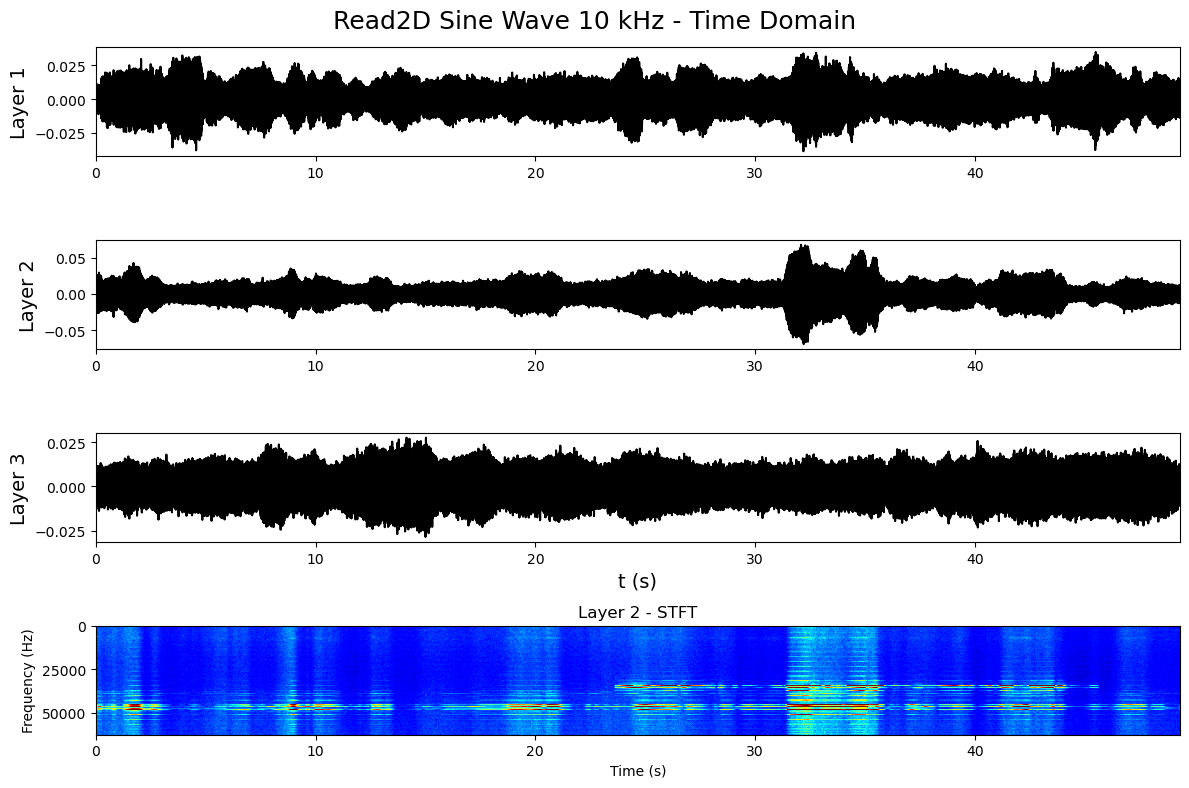

In [6]:
fs = 125000
t = np.arange(len(w1_data))*(1/fs)
f,t_stft,stft = scipy.signal.stft(w2_data, 
                             fs=fs, 
                             nperseg=2501)

fig,axs = plt.subplots(4,1,figsize=[12,8])

axs[0].plot(t,w1_data, 'k')
axs[1].plot(t,w2_data, 'k')
axs[2].plot(t,w3_data, 'k')

axs[0].set_ylabel('Layer 1',fontsize=14)
axs[1].set_ylabel('Layer 2',fontsize=14)
axs[2].set_ylabel('Layer 3',fontsize=14)
axs[2].set_xlabel('t (s)',fontsize=14)
for ax in axs[:-1]: ax.set_xlim([0,max(t)])

axs[3].imshow((abs(stft)), vmax=5e-4, aspect='auto', cmap='jet', extent=[t_stft[0],t_stft[-1],f[-1],f[0]])
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Frequency (Hz)')
axs[3].set_title('Layer 2 - STFT')

plt.suptitle('Read2D Sine Wave 10 kHz - Time Domain',fontsize=18)
plt.tight_layout()
plt.savefig('./Figures/ChirpTest_Read2D.png')